# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
type(alpaca_api_key)


str

In [5]:
type(alpaca_secret_key)

str

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
crypto = ("BTC", "ETH")
my_btc = 1.2
my_eth = 5.3
crypto_amount = (my_btc, my_eth)

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Execute get request
request_btc_data = requests.get(btc_url).json()

In [9]:
# Output data
request_btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18731231,
   'total_supply': 18731231,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 37139.0,
     'volume_24h': 54659930166,
     'market_cap': 696088922414,
     'percentage_change_1h': -0.923280403698899,
     'percentage_change_24h': 12.4571378446364,
     'percentage_change_7d': -1.45185596756983,
     'percent_change_1h': -0.923280403698899,
     'percent_change_24h': 12.4571378446364,
     'percent_change_7d': -1.45185596756983},
    'CAD': {'price': 45012.468,
     'volume_24h': 66247835361.192,
     'market_cap': 843659773965.768,
     'percent_change_1h': -0.923280403698899,
     'percent_change_24h': 12.4571378446364,
     'percent_change_7d': -1.45185596756983}},
   'last_updated': 1623287087}},
 'metadata': {'timestamp': 1623287087,
  'num_cryptocurrencies': 1292,
  'error': None}}

In [10]:
btc_price = request_btc_data["data"]['1']['quotes']['CAD']['price']
print(btc_price)

45012.468


In [11]:
# Fetch current ETH price
# Execute get request
request_eth_data = requests.get(eth_url).json()

# Output data
request_eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116227269,
   'total_supply': 116227269,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2588.0,
     'volume_24h': 43214754035,
     'market_cap': 300722299116,
     'percentage_change_1h': -1.00854737004422,
     'percentage_change_24h': 4.75255807145702,
     'percentage_change_7d': -4.75337059321743,
     'percent_change_1h': -1.00854737004422,
     'percent_change_24h': 4.75255807145702,
     'percent_change_7d': -4.75337059321743},
    'CAD': {'price': 3136.656,
     'volume_24h': 52376281890.42,
     'market_cap': 364475426528.592,
     'percent_change_1h': -1.00854737004422,
     'percent_change_24h': 4.75255807145702,
     'percent_change_7d': -4.75337059321743}},
   'last_updated': 1623287055}},
 'metadata': {'timestamp': 1623287055,
  'num_cryptocurrencies': 1292,
  'error': None}}

In [12]:
eth_price = request_eth_data["data"]['1027']['quotes']['CAD']['price']
print(eth_price)

3136.656


In [13]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
print(f" BTC value is {my_btc_value}")
print(f" ETH value is {my_eth_value}")

 BTC value is 54014.9616
 ETH value is 16624.2768


In [14]:

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
crypto_value = (my_btc_value, my_eth_value)
crypto_value

The current value of your 1.2 BTC is $54014.96
The current value of your 5.3 ETH is $16624.28


(54014.9616, 16624.2768)

In [15]:
#creating crypto dataframe
crypto_portfolio = []
data_crypto = {'Crypto':crypto, 'Amount' : crypto_amount, 'Value' : crypto_value}
crypto_portfolio = pd.DataFrame(data=data_crypto)
print(crypto_portfolio)
crypto_value = crypto_portfolio['Value'].sum()
crypto_value

  Crypto  Amount       Value
0    BTC     1.2  54014.9616
1    ETH     5.3  16624.2768


70639.2384

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares

my_agg = 200
my_spy = 50
shares=(my_agg, my_spy)
shares

(200, 50)

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
# Format current date as ISO format
start_date = pd.Timestamp("2019-06-04", tz="America/New_york").isoformat()
end_date = pd.Timestamp("2020-06-04", tz="America/New_york").isoformat()

In [19]:
# Set the tickers
tickers = ["AGG", "SPY"]


In [20]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [21]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
    ).df


In [22]:
# Preview DataFrame
df_portfolio


AGG                                       \
                             open      high     low    close    volume   
time                                                                     
2019-06-04 00:00:00-04:00  110.28  110.3800  108.85  110.300   4704680   
2019-06-05 00:00:00-04:00  110.36  110.4700  108.85  110.230   2727411   
2019-06-06 00:00:00-04:00  110.34  110.4200  110.16  110.230   2114944   
2019-06-07 00:00:00-04:00  110.64  110.6700  110.45  110.530   3436048   
2019-06-10 00:00:00-04:00  110.36  110.3600  110.22  110.240   2706969   
...                           ...       ...     ...      ...       ...   
2020-05-29 00:00:00-04:00  117.43  117.7100  117.32  117.670  16292692   
2020-06-01 00:00:00-04:00  117.35  117.3999  117.24  117.365  10635820   
2020-06-02 00:00:00-04:00  117.38  117.4700  117.31  117.450   7837090   
2020-06-03 00:00:00-04:00  117.26  117.4100  117.06  117.160  11554888   
2020-06-04 00:00:00-04:00  117.27  117.3000  116.82  116.860   9562346   

                              SPY                                          
                             open     high       low     close     volume  
time                                                                       
2019-06-04 00:00:00-04:00  277.12  280.680  276.6200  280.5200   64337734  
2019-06-05 00:00:00-04:00  282.33  282.990  280.3200  282.9000   58965379  
2019-06-06 00:00:00-04:00  283.29  285.550  282.5700  284.7400   53512841  
2019-06-07 00:00:00-04:00  285.93  288.850  285.7400  287.6300   60266286  
2019-06-10 00:00:00-04:00  289.37  290.820  288.8734  288.9305   51975211  
...                           ...      ...       ...       ...        ...  
2020-05-29 00:00:00-04:00  302.46  304.960  299.4700  304.1600  101356845  
2020-06-01 00:00:00-04:00  303.62  306.205  303.0600  305.5800   46186733  
2020-06-02 00:00:00-04:00  306.55  308.130  305.1000  308.1300   66042497  
2020-06-03 00:00:00-04:00  310.24  313.220  309.9400  312.2117   79223813  
2020-06-04 00:00:00-04:00  311.11  313.000  309.0800  311.3100   68304792  

[254 rows x 10 columns]

In [23]:
# Pick AGG and SPY close prices

# picking the last row in the dataframe
df_last = df_portfolio.iloc[-1]
print(f" The last row is \n{df_last}\n")

# picking the 3rd column and 8th column value for AGG and SPY closing price
agg_close_price = df_last.iloc[3]
spy_close_price = df_last.iloc[8]


 The last row is 
AGG  open           117.27
     high           117.30
     low            116.82
     close          116.86
     volume     9562346.00
SPY  open           311.11
     high           313.00
     low            309.08
     close          311.31
     volume    68304792.00
Name: 2020-06-04 00:00:00-04:00, dtype: float64



In [24]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.86
Current SPY closing price: $311.31


In [25]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

my_value = (my_agg_value, my_spy_value)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15565.50
The current value of your 200 AGG shares is $23372.00


In [26]:
# creating a datafrom for the portfolio
share_portfolio = []
data_shares={'Ticker' : tickers, 'Shares' : shares, 'Share value' : my_value }
share_portfolio = pd.DataFrame(data=data_shares)
print(share_portfolio)
share_value = share_portfolio['Share value'].sum()
share_value

  Ticker  Shares  Share value
0    AGG     200      23372.0
1    SPY      50      15565.5


38937.5

### Savings Health Analysis

In [27]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets_df = [] 

# Create savings DataFrame
df_savings = []
save_type = ("crypto","shares")
save_amt = (crypto_value, share_value)
data_savings = {'Type' : save_type , 'Amount' : save_amt}
df_savings = pd.DataFrame(data=data_savings)


In [28]:
# Display savings DataFrame
display(df_savings)

,Type,Amount
0,crypto,70639.2384
1,shares,38937.5000


([<matplotlib.patches.Wedge at 0x225e2bf6310>,
 [Text(-0.48286340553442975, 0.988353647029085, 'Crypto'),
  Text(0.4828633129980812, -0.9883536922380153, 'Shares')])

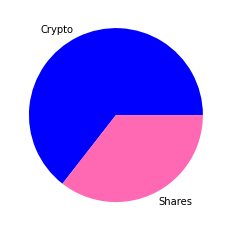

In [29]:
# Plot savings pie chart
y=df_savings["Amount"]
mylabels = ["Crypto" , "Shares"]
mycolors = ["b", "hotpink"]
plt.pie(y, labels=mylabels, colors = mycolors)

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


In [31]:
# Calculate total amount of savings
savings_amount= df_savings["Amount"].sum()
savings_amount


109576.7384

In [32]:
# Validate saving health
savings_amount > emergency_fund
print("Congratulations ! You have enough money in your emergency fund")

Congratulations ! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-07', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
    ).df


In [35]:
# Display sample data
df_stock_data

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-06-15 00:00:00-04:00  109.90  109.90  109.780  109.870  1938779.0   
2017-06-16 00:00:00-04:00  109.86  109.97  109.850  109.945  1709677.0   
2017-06-19 00:00:00-04:00  109.87  109.90  109.740  109.790  1375531.0   
2017-06-20 00:00:00-04:00  109.85  110.03  109.800  109.975  2010628.0   
2017-06-21 00:00:00-04:00  109.88  110.04  109.880  109.980  1085301.0   
...                           ...     ...      ...      ...        ...   
2021-06-01 00:00:00-04:00  114.40  114.40  114.164  114.340  5655159.0   
2021-06-02 00:00:00-04:00  114.45  114.51  114.300  114.485  5649317.0   
2021-06-03 00:00:00-04:00  114.31  114.46  114.210  114.210  3270096.0   
2021-06-04 00:00:00-04:00  114.39  114.67  114.220  114.665  4334878.0   
2021-06-07 00:00:00-04:00  113.97  114.64  113.970  114.595  3639918.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2017-06-15 00:00:00-04:00     NaN     NaN       NaN     NaN         NaN  
2017-06-16 00:00:00-04:00  242.77  242.83  241.6337  242.63  48998243.0  
2017-06-19 00:00:00-04:00  243.59  244.73  243.4800  244.64  42503652.0  
2017-06-20 00:00:00-04:00  244.25  244.26  242.9900  243.04  39203167.0  
2017-06-21 00:00:00-04:00  243.43  243.59  242.4100  242.95  42746920.0  
...                           ...     ...       ...     ...         ...  
2021-06-01 00:00:00-04:00  422.57  422.72  419.2000  419.63  47607950.0  
2021-06-02 00:00:00-04:00  420.37  421.23  419.2900  420.38  41250387.0  
2021-06-03 00:00:00-04:00  417.87  419.99  416.2800  418.86  51582905.0  
2021-06-04 00:00:00-04:00  420.75  422.92  418.8422  422.57  45129316.0  
2021-06-07 00:00:00-04:00  422.59  422.78  421.1900  422.23  41442963.0  

[1001 rows x 10 columns]

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# setting number if simulations
num_sims = 500

In [37]:
# Printing the simulation input data
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000694,1.002805,0.995570,1.011885,0.998223,0.996193,0.993240,1.001708,1.007820,0.999203,...,1.007179,1.007934,0.996063,0.992864,1.007187,1.008549,0.990434,0.995206,1.011303,1.006761
2,1.002003,1.010689,0.995158,1.008559,0.994008,0.984522,0.992453,1.010778,1.013112,1.008422,...,0.993777,1.019252,1.005352,0.997880,1.007266,1.006996,1.000193,0.979360,1.014463,1.009402
3,0.995217,1.010129,0.982940,1.007887,1.004025,0.994530,0.986202,1.016220,1.023117,0.996450,...,0.983066,1.016647,1.008827,1.007623,1.013626,1.026709,0.996424,0.987254,1.019681,1.013928
4,1.001979,1.012053,0.977533,1.018449,1.020389,0.982455,0.986867,1.017029,1.029667,1.002431,...,0.976725,1.022433,1.015254,1.019396,0.998302,1.028363,1.002445,0.984152,1.028771,1.023944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.204411,11.342593,5.704946,12.856644,10.868169,23.320732,12.031473,19.384136,29.210586,18.438351,...,31.159484,18.923232,43.076937,19.660309,63.120803,8.896050,13.790913,20.025440,18.910887,12.187255
7557,6.234802,11.344718,5.721165,12.887577,10.829306,23.382170,12.055899,19.474494,29.826555,18.589673,...,31.051724,18.964032,43.083980,19.594234,62.650220,8.963115,13.945781,20.199192,19.052292,12.227530
7558,6.243099,11.459465,5.702014,12.909671,10.621389,23.513478,12.014943,19.783158,29.599150,18.499979,...,31.031002,18.843584,43.122325,19.996947,62.267398,8.929834,13.934293,20.274973,19.054480,12.163074
7559,6.221780,11.493314,5.662855,12.944832,10.582145,23.496661,12.004593,19.841857,29.439297,18.559046,...,31.351519,18.741086,43.716344,20.125637,61.480137,8.976061,13.864873,20.263866,19.278967,12.098165


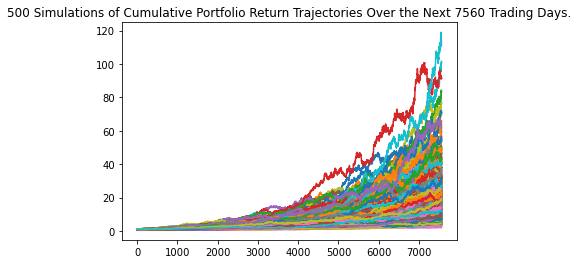

In [39]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()

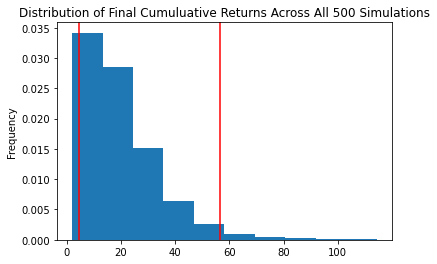

In [40]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
portfolio_tbl = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(portfolio_tbl)

count           500.000000
mean             20.451219
std              14.787119
min               1.955577
25%               9.998421
50%              16.276951
75%              26.362988
max             114.338298
95% CI Lower      4.316980
95% CI Upper     56.362340
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [42]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(portfolio_tbl[8] * initial_investment,2)
ci_upper = round(portfolio_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86339.6 and $1127246.79


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [43]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(portfolio_tbl[8] * initial_investment,2)
ci_upper = round(portfolio_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $129509.4 and $1690870.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights = [0.40, 0.60],
    num_trading_days = 252*5
)


In [45]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007597,1.010907,1.006395,0.994887,1.000484,0.992294,1.010711,0.996727,0.994041,0.987843,...,1.013789,1.000313,1.001272,0.994731,1.004679,1.010322,0.989424,1.013186,1.005727,1.001562
2,1.001977,1.009921,0.996608,1.000983,0.998989,0.996630,1.012114,0.994915,0.998720,0.979974,...,1.018484,0.987062,1.005044,0.994111,1.011380,1.014610,0.980679,1.021311,1.009110,0.987552
3,1.002056,1.024297,1.003116,1.013200,0.992279,1.005913,1.013531,1.004367,1.009803,0.965311,...,1.006684,0.987627,0.996170,0.995972,1.013432,1.008104,0.987026,1.018307,1.000458,0.998027
4,1.001013,1.013870,0.984033,1.018349,0.985500,1.016015,1.010825,1.002975,1.018617,0.970226,...,1.005900,0.992240,0.991710,1.008935,1.013320,0.996481,0.979182,1.014697,0.996566,1.003048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.461409,1.875313,2.227471,2.558068,1.596400,1.980801,1.640137,1.444336,1.360299,1.004325,...,1.641487,1.821408,2.593780,1.579318,1.778333,1.881962,1.912624,1.540848,1.733085,2.113329
1257,1.470430,1.862245,2.245158,2.575049,1.600992,1.995511,1.634778,1.454280,1.351329,0.997485,...,1.637411,1.833711,2.580083,1.566069,1.776377,1.874045,1.911026,1.567184,1.721620,2.106784
1258,1.465289,1.846380,2.221993,2.580132,1.606431,1.977102,1.648685,1.448718,1.352925,1.003107,...,1.637217,1.822203,2.544153,1.599427,1.785113,1.863531,1.884077,1.579013,1.727159,2.120179
1259,1.470198,1.861934,2.221895,2.573762,1.621171,1.979234,1.626686,1.437916,1.363546,1.004261,...,1.659137,1.827181,2.564399,1.592404,1.799078,1.862196,1.896013,1.595895,1.718527,2.124419


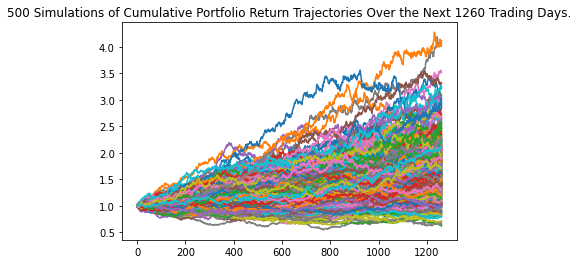

In [46]:
# Plot simulation outcomes
line_plot_5years = MC_5years.plot_simulation()

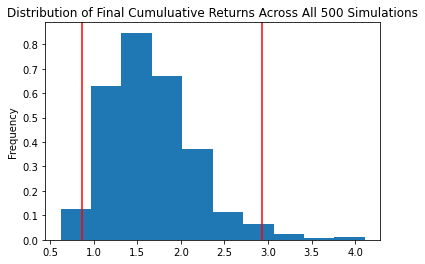

In [47]:
# Plot probability distribution and confidence intervals
dist_plot_5years = MC_5years.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5years_tbl = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(MC_5years_tbl)

count           500.000000
mean              1.657487
std               0.512102
min               0.618220
25%               1.296939
50%               1.597174
75%               1.953313
max               4.112000
95% CI Lower      0.869708
95% CI Upper      2.930065
Name: 1260, dtype: float64


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_5years_tbl[8] * initial_investment,2)
ci_upper_five = round(MC_5years_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52182.51 and $175803.91


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights = [0.40, 0.60],
    num_trading_days = 252*10
)

In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006484,1.004083,1.007208,1.007864,1.005544,1.001758,0.991496,1.010982,1.008766,0.995192,...,0.998020,1.002648,0.995602,0.995318,0.999312,1.006001,1.000313,0.979797,0.989585,0.999904
2,1.021420,1.012825,0.998358,1.000354,1.001269,0.996421,0.999874,1.018476,1.011377,0.986224,...,0.997344,0.989707,1.007890,1.002021,0.990967,1.004449,1.010185,0.966673,0.995613,1.012417
3,1.016046,1.003650,1.000019,0.996591,1.008284,0.999097,0.992029,1.019538,1.031808,0.999186,...,0.998919,0.981749,1.013944,0.998842,0.989430,1.013349,0.999596,0.960889,1.010575,1.001210
4,1.021722,1.012804,0.998354,1.000107,1.012978,1.006480,0.991174,1.015310,1.021550,0.986478,...,1.016366,0.977460,1.016859,1.000433,0.995461,1.020387,0.999174,0.966165,1.004491,1.014608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.486710,2.094871,1.145178,1.892372,1.299508,2.089718,2.294133,5.664277,3.062078,1.924597,...,3.042860,2.846513,1.215762,2.321412,1.988039,2.152674,2.873026,3.135932,3.230310,2.996461
2517,2.454984,2.103811,1.146635,1.884399,1.308678,2.092370,2.313325,5.637894,3.076805,1.911371,...,3.012151,2.864879,1.214349,2.337063,1.962067,2.166419,2.856875,3.175577,3.221585,3.008217
2518,2.449705,2.100826,1.142711,1.897168,1.319253,2.097423,2.331332,5.614997,3.099672,1.927490,...,3.010624,2.887386,1.214815,2.337044,1.993311,2.167229,2.843768,3.206567,3.208497,3.051318
2519,2.436704,2.103758,1.149031,1.923619,1.303241,2.107352,2.337773,5.611763,3.076021,1.924496,...,3.032729,2.893071,1.219816,2.356712,1.990118,2.158728,2.831639,3.254426,3.238242,3.110941


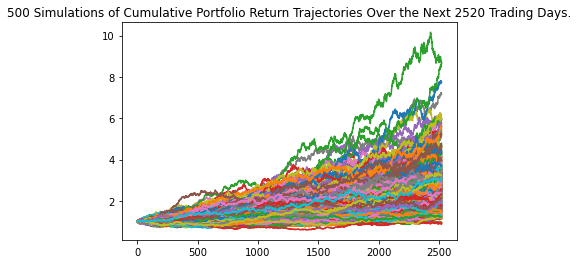

In [52]:
# Plot simulation outcomes
line_plot_10years = MC_10years.plot_simulation()

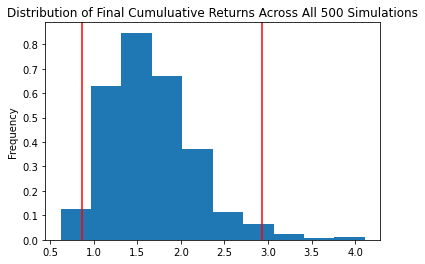

In [53]:
# Plot probability distribution and confidence intervals
dist_plot_10years = MC_5years.plot_distribution()

In [54]:

# Fetch summary statistics from the Monte Carlo simulation results
MC_10years_tbl = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MC_10years_tbl)

count           500.000000
mean              2.717070
std               1.091662
min               0.883653
25%               1.985861
50%               2.507401
75%               3.261947
max               8.692075
95% CI Lower      1.215633
95% CI Upper      5.569357
Name: 2520, dtype: float64


In [55]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_10years_tbl[8] * initial_investment,2)
ci_upper_ten = round(MC_10years_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $72937.99 and $334161.4
